In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.drop(columns=['Cabin'])

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [22]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [52]:
print("\nStatistical Summary:\n")
df.describe().style.background_gradient(cmap='Blues')


Statistical Summary:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


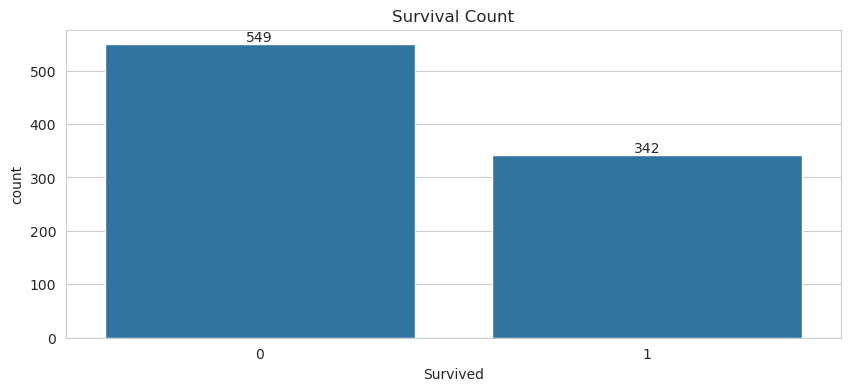

In [42]:
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")

# Add exact numbers on top of bars
from matplotlib.pyplot import gca
ax = gca()

for bar in ax.containers:
    ax.bar_label(bar)

plt.show()

/tmp/ipykernel_10269/1038108532.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')


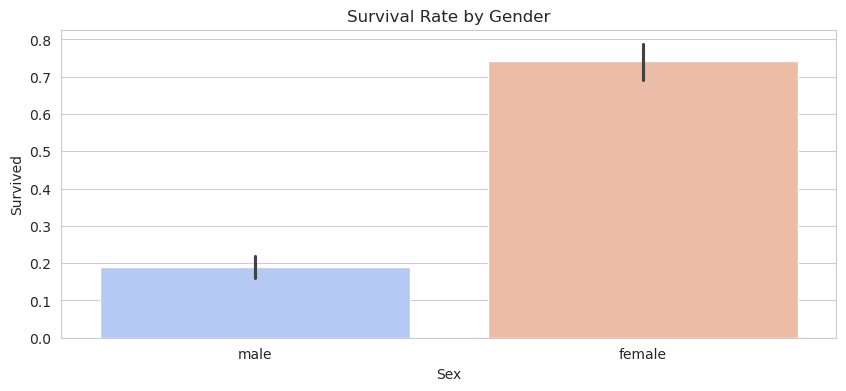

In [58]:
sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')
plt.title("Survival Rate by Gender")
plt.show()

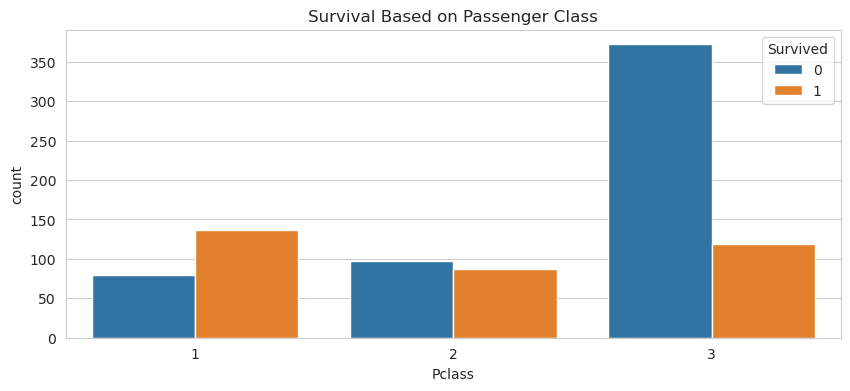

In [61]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Based on Passenger Class")
plt.show()

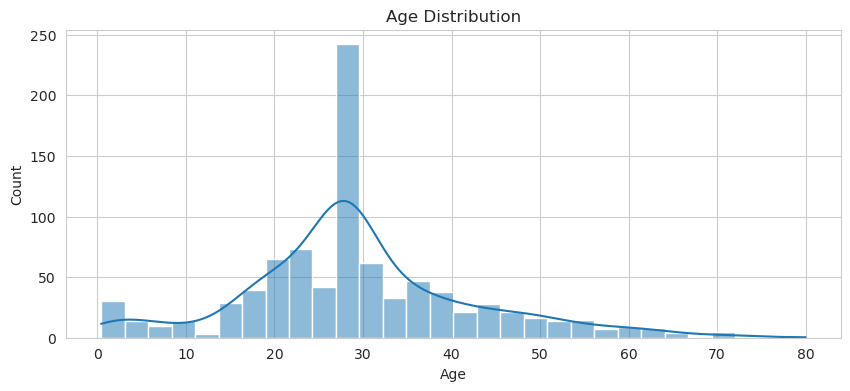

In [55]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

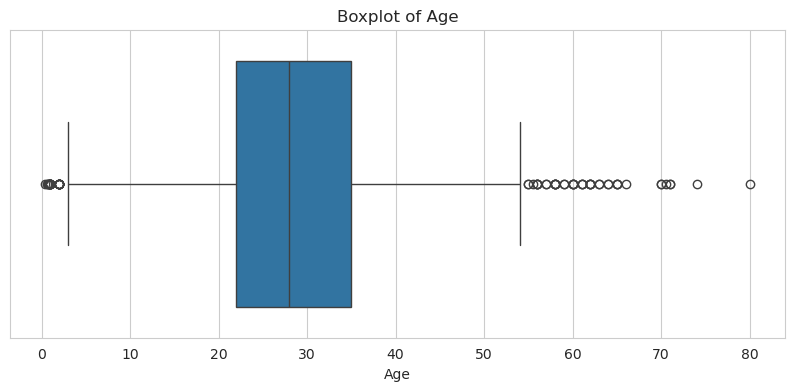

In [46]:
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.show()

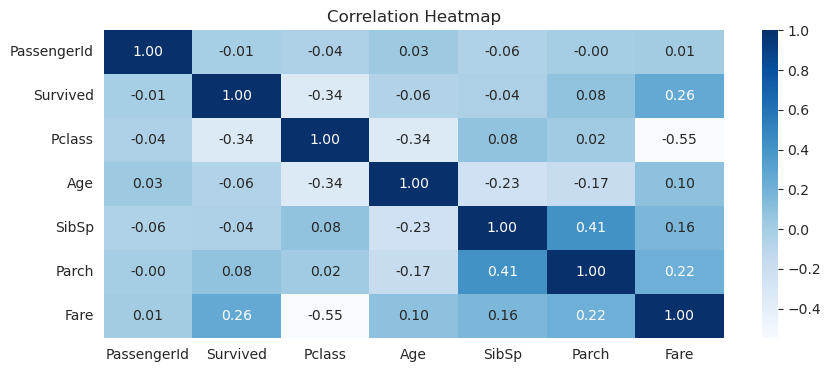

In [48]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipykernel_10269/4112100085.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='mako')


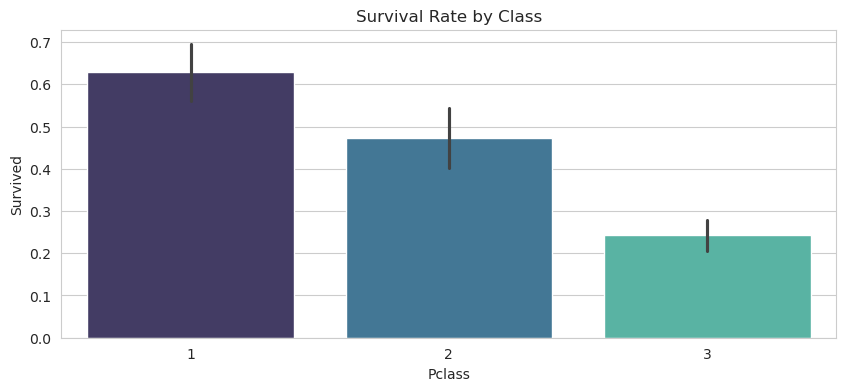

In [63]:
sns.barplot(x='Pclass', y='Survived', data=df, palette='mako')
plt.title("Survival Rate by Class")
plt.show()

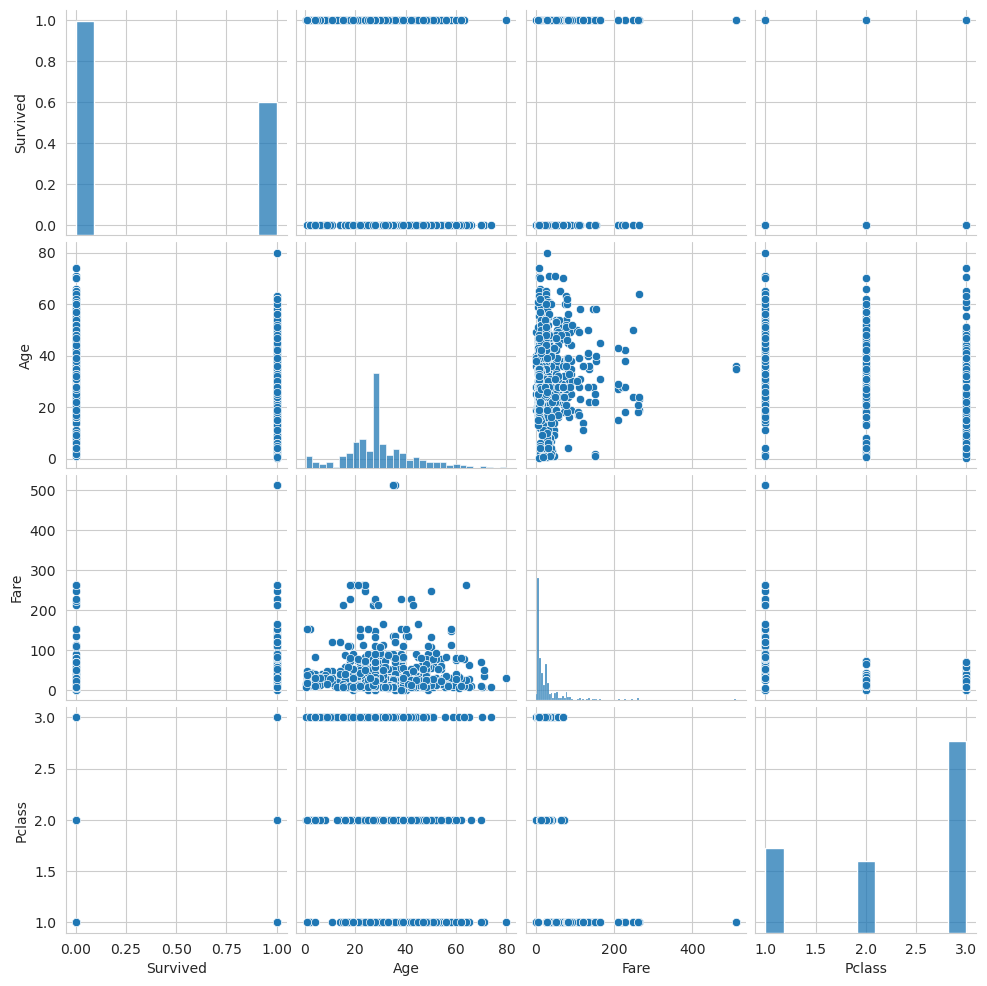

In [67]:
sns.pairplot(df[['Survived','Age','Fare','Pclass']])
plt.show()


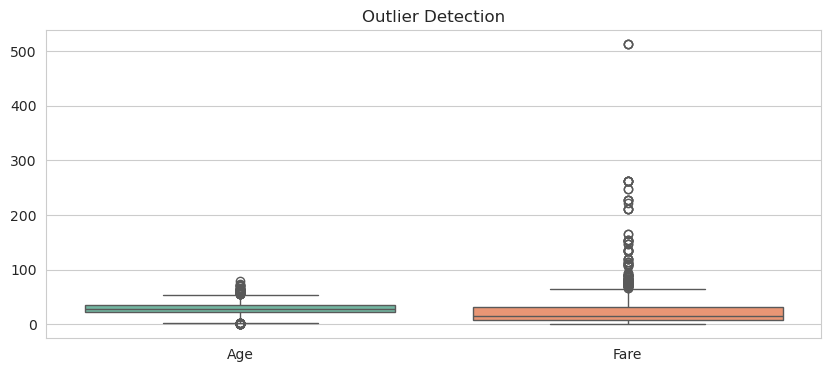

In [65]:
sns.boxplot(data=df[['Age','Fare']], palette='Set2')
plt.title("Outlier Detection")
plt.show()